In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os

In [2]:
spotSeg_folder_path = r'D:\RNAScope\miR-16\RNASpotsSeg'
spotSeg_file_list = os.listdir(spotSeg_folder_path)
spotSeg_file_list = [file for file in spotSeg_file_list if file.split('.')[-1] == 'tiff']
spotSeg_file_list

['BNL3_3T3_X_miR-16Ctrl+ve_Simple Segmentation.tiff',
 'BNL3_F161_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F162_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F163_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F164_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F165_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F166_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F167_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F168_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F169_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F202_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F203_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F204_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F205_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F206_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F207_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F208_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F209_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F210_6_miR-16_Simple Segmentation.tiff',
 'BNL3_F230_1_miR-16Ctrl-ve_Simple Segmentation.tiff',
 'BNL3_F230_2_miR-16Ctrl+ve

In [3]:
partSeg_folder_path = r'D:\RNAScope\miR-16\KidneyRegionMask'
partSeg_file_list = os.listdir(partSeg_folder_path)
partSeg_file_list = [file for file in partSeg_file_list if file.split('.')[-1] == 'tif']
partSeg_file_list

['BNL3_3T3_X_miR-16Ctrl+ve_msk.tif',
 'BNL3_F161_6_miR-16_msk.tif',
 'BNL3_F162_6_miR-16_msk.tif',
 'BNL3_F163_6_miR-16_msk.tif',
 'BNL3_F164_6_miR-16_msk.tif',
 'BNL3_F165_6_miR-16_msk.tif',
 'BNL3_F166_6_miR-16_msk.tif',
 'BNL3_F167_6_miR-16_msk.tif',
 'BNL3_F168_6_miR-16_msk.tif',
 'BNL3_F169_6_miR-16_msk.tif',
 'BNL3_F202_6_miR-16_msk.tif',
 'BNL3_F203_6_miR-16_msk.tif',
 'BNL3_F204_6_miR-16_msk.tif',
 'BNL3_F205_6_miR-16_msk.tif',
 'BNL3_F206_6_miR-16_msk.tif',
 'BNL3_F207_6_miR-16_msk.tif',
 'BNL3_F208_6_miR-16_msk.tif',
 'BNL3_F209_6_miR-16_msk.tif',
 'BNL3_F210_6_miR-16_msk.tif',
 'BNL3_F230_1_miR-16Ctrl-ve_msk.tif',
 'BNL3_F230_2_miR-16Ctrl+ve_msk.tif']

In [4]:
print(len(spotSeg_file_list))
print(len(partSeg_file_list))

21
21


In [5]:
value2part_dict = {
    1:'CTX',
    2:'OSOM',
    3:'ISOM',
    4:'IM',
    5:'MSK'
}
value_list = value2part_dict.keys()

In [6]:
# img_path = os.path.join(partSeg_folder_path,partSeg_file_list[0])
# msk_img = cv2.imread(img_path, 0)
# plt.imshow(msk_img, cmap='gray')

In [7]:
# file_idx = 9
# img_path = os.path.join(spotSeg_folder_path,spotSeg_file_list[0])
# spot_img = cv2.imread(img_path, 0)
# spot_img[spot_img==1]=255
# spot_img[spot_img==2]=0
# x_fig_size,y_fig_size = spot_img.shape
# xy_ratio = y_fig_size/x_fig_size
# plt.figure(figsize = (20,20*xy_ratio))
# plt.imshow(spot_img, cmap='gray')

In [6]:
file_idx = 18
print(partSeg_file_list[file_idx])
print(spotSeg_file_list[file_idx])

BNL3_F210_6_miR-16_msk.tif
BNL3_F210_6_miR-16_Simple Segmentation.tiff


In [7]:
for file_idx in range(len(partSeg_file_list)):
    img_path = os.path.join(partSeg_folder_path,partSeg_file_list[file_idx])
    msk_img = cv2.imread(img_path, 0)
    
    img_path = os.path.join(spotSeg_folder_path,spotSeg_file_list[file_idx])
    spot_img = cv2.imread(img_path, 0)
    
    if msk_img.shape != spot_img.shape:
        print('{} shape not matching| msk{}, spot{}'.format(partSeg_file_list[file_idx], msk_img.shape, spot_img.shape))

In [8]:
file_idx = 0
whole_slide_df = None
count = 0
file_num = len(partSeg_file_list)

In [9]:
for file_idx in range(len(partSeg_file_list)):
    img_path = os.path.join(partSeg_folder_path,partSeg_file_list[file_idx])
    msk_img = cv2.imread(img_path, 0)

    img_path = os.path.join(spotSeg_folder_path,spotSeg_file_list[file_idx])
    spot_img = cv2.imread(img_path, 0)
    spot_img[spot_img==1]=1
    spot_img[spot_img==2]=0
          
    exp,slide,section,stain,*other = partSeg_file_list[file_idx].split('_')
    
    count += 1
    print('{}/{} Img {} is now processing'.format(count, file_num, spotSeg_file_list[file_idx]))
    if 'Ctrl' in stain:
        ctrl = 'Ctrl' + stain.split('Ctrl')[1]
        stain = stain.split('Ctrl')[0]
    else:
        ctrl = ''

    for value in value_list:
        region_name = value2part_dict[value]
        print('\t{}'.format(region_name), end=' ')

        tmp_msk = msk_img.copy()
        tmp_msk[tmp_msk!=value]=0
        tmp_msk[tmp_msk==value]=1
        # plt.imshow(tmp_msk,cmap='gray')
        region_area = tmp_msk.sum()
        print(region_area)

        # Only want the spot in the current region
        res = np.logical_and(spot_img,tmp_msk).astype('uint8')
        res[res==0]=0
        res[res==1]=255
        contours, hierarchy = cv2.findContours(res, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

        print('\t\t{}'.format(len(contours)))

        contour_area_dict = {}
        for idx in range(len(contours)):
            contour_area_dict[idx] = cv2.contourArea(contours[idx])

        contour_area_dict2 = {
                                'slide_contour_index':contour_area_dict.keys(),
                                'area':contour_area_dict.values(),
                                'experient':exp,
                                'slide':slide,
                                'section':section,
                                'stain':stain,
                                'control':ctrl,
                                'region':region_name,
                                'region_area':region_area,
                                'contour_info':contours
        }
        tmp_contour_df = pd.DataFrame.from_dict(contour_area_dict2)
        tmp_contour_df.index.names = ['index']

        try:
            whole_slide_df = pd.concat([whole_slide_df, tmp_contour_df], ignore_index=True)
        except:
            whole_slide_df = tmp_contour_df

1/21 Img BNL3_3T3_X_miR-16Ctrl+ve_Simple Segmentation.tiff is now processing
	CTX 0
		0
	OSOM 0
		0
	ISOM 0
		0
	IM 0
		0
	MSK 365548435
		857886
2/21 Img BNL3_F161_6_miR-16_Simple Segmentation.tiff is now processing
	CTX 114897427
		472908
	OSOM 50827410
		137635
	ISOM 39031281
		152415
	IM 23890654
		95788
	MSK 0
		0
3/21 Img BNL3_F162_6_miR-16_Simple Segmentation.tiff is now processing
	CTX 167480693
		695579
	OSOM 60005067
		159366
	ISOM 38374448
		153444
	IM 9074114
		29606
	MSK 0
		0
4/21 Img BNL3_F163_6_miR-16_Simple Segmentation.tiff is now processing
	CTX 124268755
		412331
	OSOM 60060211
		140595
	ISOM 40080324
		123239
	IM 26066514
		87547
	MSK 0
		0
5/21 Img BNL3_F164_6_miR-16_Simple Segmentation.tiff is now processing
	CTX 28840288
		102387
	OSOM 81716091
		203578
	ISOM 52715617
		184426
	IM 13790241
		38685
	MSK 0
		0
6/21 Img BNL3_F165_6_miR-16_Simple Segmentation.tiff is now processing
	CTX 119157040
		544469
	OSOM 39323326
		110339
	ISOM 37914973
		160074
	IM 17505330


In [10]:
whole_slide_df.to_pickle(r'D:\RNAScope\miR-16\miR-16_result1.pkl')

In [11]:
whole_slide_df

,slide_contour_index,area,experient,slide,section,stain,control,region,region_area,contour_info
0,0.0,8.5,BNL3,3T3,X,miR-16,Ctrl+ve,MSK,365548435,"[[[12004, 22780]], [[12003, 22781]], [[12003, ..."
1,1.0,0.0,BNL3,3T3,X,miR-16,Ctrl+ve,MSK,365548435,"[[[12060, 22777]]]"
2,2.0,0.0,BNL3,3T3,X,miR-16,Ctrl+ve,MSK,365548435,"[[[12294, 22775]], [[12295, 22776]]]"
3,3.0,0.0,BNL3,3T3,X,miR-16,Ctrl+ve,MSK,365548435,"[[[12001, 22769]]]"
4,4.0,0.0,BNL3,3T3,X,miR-16,Ctrl+ve,MSK,365548435,"[[[11995, 22768]]]"
...,...,...,...,...,...,...,...,...,...,...
16051144,60643.0,1.0,BNL3,F230,2,miR-16,Ctrl+ve,IM,13976986,"[[[8379, 10439]], [[8380, 10440]], [[8381, 104..."
16051145,60644.0,0.0,BNL3,F230,2,miR-16,Ctrl+ve,IM,13976986,"[[[8340, 10433]], [[8341, 10433]]]"
16051146,60645.0,13.0,BNL3,F230,2,miR-16,Ctrl+ve,IM,13976986,"[[[8326, 10424]], [[8327, 10425]], [[8327, 104..."
16051147,60646.0,1.5,BNL3,F230,2,miR-16,Ctrl+ve,IM,13976986,"[[[8382, 10418]], [[8382, 10419]], [[8385, 104..."


In [113]:
whole_slide_df[whole_slide_df['area']!=0]['region'].value_counts()['CTX'] / whole_slide_df.query('region =="CTX"')['region_area'].unique().sum()

0.0514768421866543

In [114]:
whole_slide_df[whole_slide_df['area']!=0]['region'].value_counts()['OSOM'] / whole_slide_df.query('region =="OSOM"')['region_area'].unique().sum()

0.02739508629120737

In [115]:
whole_slide_df[whole_slide_df['area']!=0]['region'].value_counts()['ISOM'] / whole_slide_df.query('region =="ISOM"')['region_area'].unique().sum()

0.01560099066329984

In [116]:
whole_slide_df[whole_slide_df['area']!=0]['region'].value_counts()['IM'] / whole_slide_df.query('region =="IM"')['region_area'].unique().sum()

0.009982943305261324

605909.5
count    147806.000000
mean          4.099357
std           5.747816
min           0.500000
25%           1.000000
50%           2.000000
75%           5.000000
max         139.500000
Name: area, dtype: float64


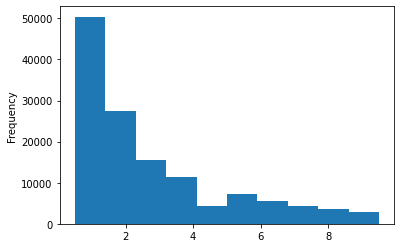

In [63]:
print(whole_slide_df[whole_slide_df['region']=='CTX']['area'].sum())
print(whole_slide_df.query('region == "CTX" and area > 0')['area'].describe())
ax = whole_slide_df.query('region == "CTX" and area > 0 and area < 10')['area'].plot.hist()

148009.0
count    48902.000000
mean         3.026645
std          3.779227
min          0.500000
25%          0.500000
50%          1.500000
75%          3.500000
max         63.500000
Name: area, dtype: float64


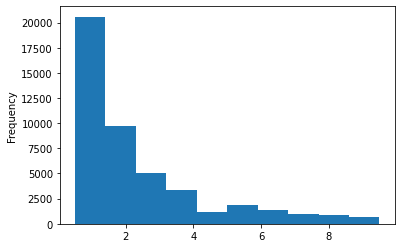

In [64]:
print(whole_slide_df[whole_slide_df['region']=='OSOM']['area'].sum())
print(whole_slide_df.query('region == "OSOM" and area > 0')['area'].describe())
ax = whole_slide_df.query('region == "OSOM" and area > 0 and area < 10')['area'].plot.hist()

202872.5
count    58245.000000
mean         3.483089
std          4.183276
min          0.500000
25%          1.000000
50%          2.000000
75%          4.500000
max        108.500000
Name: area, dtype: float64


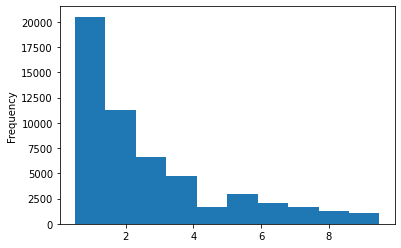

In [65]:
print(whole_slide_df[whole_slide_df['region']=='ISOM']['area'].sum())
print(whole_slide_df.query('region == "ISOM" and area > 0')['area'].describe())
ax = whole_slide_df.query('region == "ISOM" and area > 0 and area < 10')['area'].plot.hist()

31903.5
count    10213.000000
mean         3.123813
std          3.541604
min          0.500000
25%          1.000000
50%          2.000000
75%          4.000000
max         57.000000
Name: area, dtype: float64


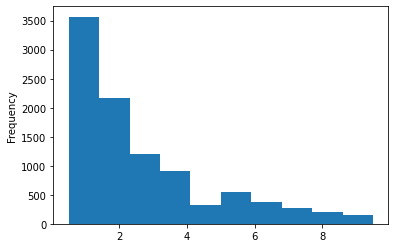

In [66]:
print(whole_slide_df[whole_slide_df['region']=='IM']['area'].sum())
print(whole_slide_df.query('region == "IM" and area > 0')['area'].describe())
ax = whole_slide_df.query('region == "IM" and area > 0 and area < 10')['area'].plot.hist()

In [39]:
len(contours)

589727

In [45]:
contours[50].shape

(6, 1, 2)

In [37]:
contour_df['area'].describe()

count    589727.000000
mean          6.090112
std          11.260024
min           0.000000
25%           0.000000
50%           2.000000
75%           7.500000
max         507.000000
Name: area, dtype: float64

In [38]:
contour_df[contour_df['area']==0]

,slide_contour_index,area,experient,slide,section,stain,control
index,,,,,,,
0,0,0.0,BNL3,F167,2,Let-7a,
1,1,0.0,BNL3,F167,2,Let-7a,
2,2,0.0,BNL3,F167,2,Let-7a,
3,3,0.0,BNL3,F167,2,Let-7a,
6,6,0.0,BNL3,F167,2,Let-7a,
...,...,...,...,...,...,...,...
589716,589716,0.0,BNL3,F167,2,Let-7a,
589717,589717,0.0,BNL3,F167,2,Let-7a,
589719,589719,0.0,BNL3,F167,2,Let-7a,


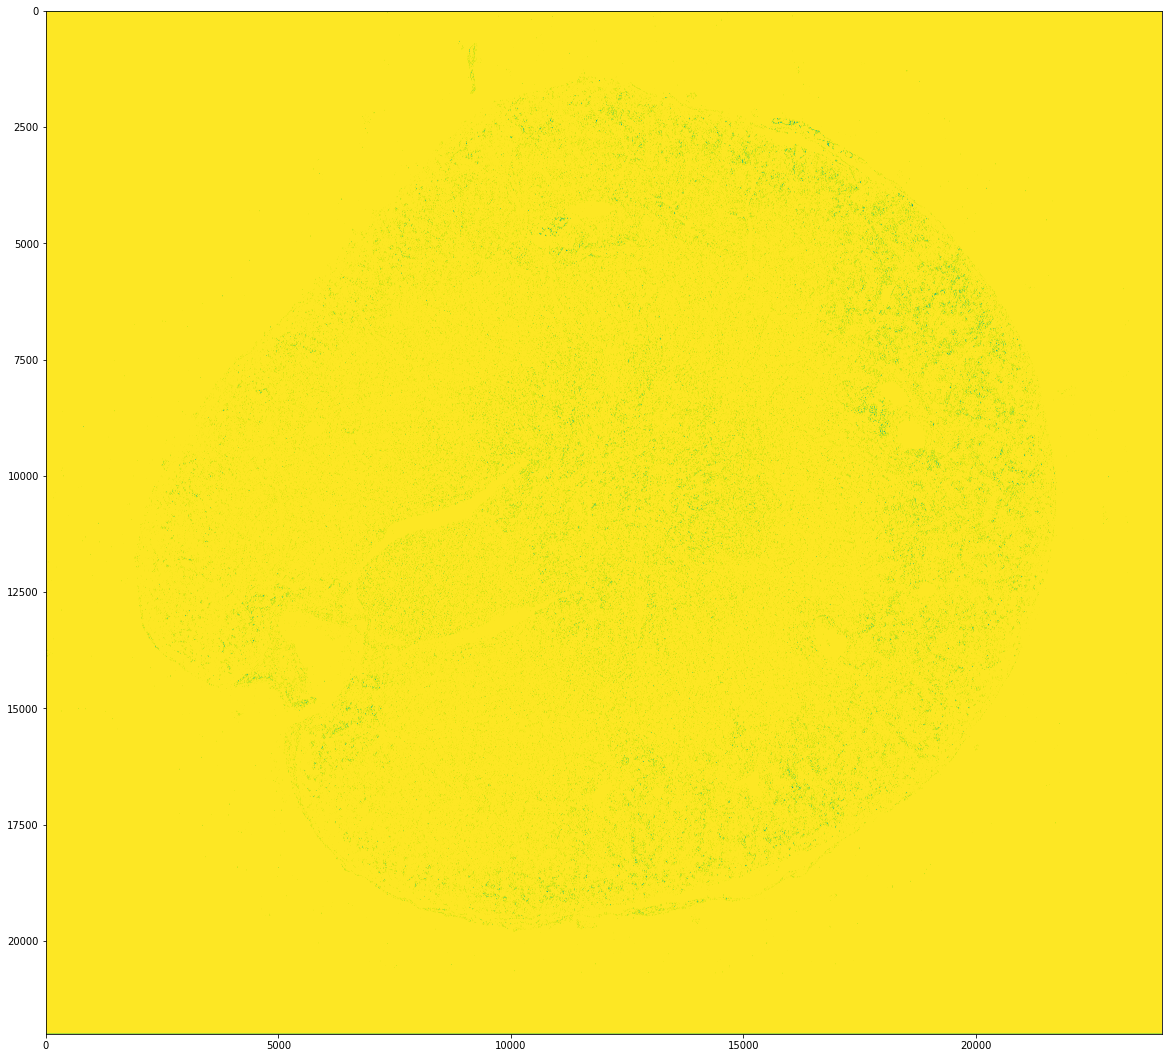

In [31]:
plt.figure(figsize = (20,20*xy_ratio))
plt.imshow(cv2.drawContours(img, [contours[0]], 0, (0,255,0), 3))